230607 수요일 군AI 실습 자료입니다.   
본 내용은 IIPL (Intelligent Information Processing Lab) 소속 석사과정 유승욱 조교가 작성하였습니다.   
참고 자료: Q Learning with OpenAI Gym, DQN Acrobot-v1

> Lecture 6 
- Frozen Lake: Set Environment
- Frozen Lake: Training
- Frozen Lake: Results
- Acrobot: Set Environment
- Acrobot: Training
- Acrobot: Results

### Libraries

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from collections import deque
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomUniform

import gym

### Frozen Lake: Set Environment

In [2]:
env = gym.make('FrozenLake-v1', is_slippery=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
""" TODO: Define state & action size """

# Define state & action size
state_size  = env.observation_space.n
action_size = env.action_space.n

print(f'Actions: {action_size}, States: {state_size}')

Actions: 4, States: 16


In [4]:
""" TODO: Define Q matrix using np.zeros """

# Define Q matrix
Q = np.zeros((state_size, action_size))

print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
""" TODO: Return new state, reward, and so on """

# Check some random actions
env.reset()
for i in range(10):
  random_act = env.action_space.sample()
  new_state, reward, done, info = env.step(random_act)
  prob = info['prob']
  #env.render()
  
  print(f'new state: {new_state}, reward: {reward}, done: {done}, prob: {info}')
  
  if done: break

new state: 1, reward: 0.0, done: False, prob: {'prob': 0.3333333333333333}
new state: 2, reward: 0.0, done: False, prob: {'prob': 0.3333333333333333}
new state: 3, reward: 0.0, done: False, prob: {'prob': 0.3333333333333333}
new state: 2, reward: 0.0, done: False, prob: {'prob': 0.3333333333333333}
new state: 1, reward: 0.0, done: False, prob: {'prob': 0.3333333333333333}
new state: 5, reward: 0.0, done: True, prob: {'prob': 0.3333333333333333, 'TimeLimit.truncated': False}


### Frozen Lake: Training

In [6]:
""" TODO: Set your own hyper-parameters """

# Set hyper-parameters
lr    = 0.70
gamma = 0.90

num_episodes = 2000
max_steps    = 99

In [7]:
""" TODO: Define your Q-learning algorithm """

reward_lst = []

for episode in tqdm(range(num_episodes)):
  # Reset environment
  state = env.reset()
  rewards = 0
  done = False

  # Decay epsilon greedy
  e = 1 / ((i//100) + 1)

  # Continue until 'max_steps per episode' or 'done'
  step = 0
  while step < max_steps:
    step += 1

    # Choose an action by epsilon
    if np.random.rand(1) < e:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    # Update new_state, reward, and so on
    new_state, reward, done, info = env.step(action)

    # Update Q matrix & variables
    Q[state, action] = Q[state, action] +\
                       lr * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])
    rewards += reward
    state = new_state

    if done == True: break

  reward_lst.append(rewards)

100%|██████████| 2000/2000 [00:01<00:00, 1665.31it/s]


### Frozen Lake: Results

In [8]:
print(f'success rate: {str(sum(reward_lst) / num_episodes)}')

print('Q after training')
print(Q)

success rate: 0.0165
Q after training
[[0.36224912 0.34883576 0.39452106 0.34343912]
 [0.09465499 0.37627066 0.37865796 0.36145794]
 [0.38427876 0.37833433 0.22952113 0.36139929]
 [0.43145526 0.37755864 0.35188569 0.36153656]
 [0.44021499 0.12593929 0.3165019  0.02850285]
 [0.         0.         0.         0.        ]
 [0.01318582 0.12619517 0.46998882 0.02992184]
 [0.         0.         0.         0.        ]
 [0.03314869 0.47649281 0.53407287 0.48463983]
 [0.56825352 0.54691027 0.06254579 0.48159104]
 [0.64352148 0.65436971 0.74907182 0.58335578]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.04901124 0.13544723 0.6462493  0.48253087]
 [0.70693096 0.78726692 0.94692713 0.89808089]
 [0.         0.         0.         0.        ]]


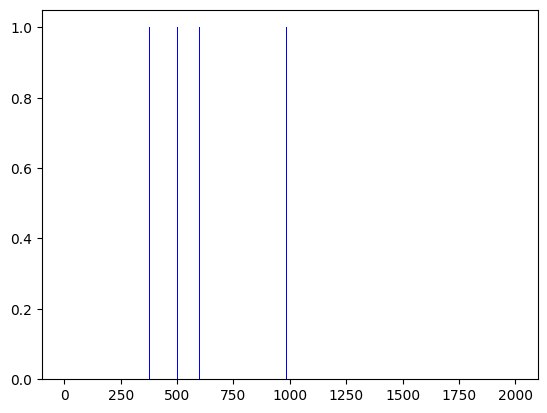

In [9]:
plt.bar(range(len(reward_lst)), reward_lst, color='blue')
plt.show()

### Acrobot: Set Environment

In [10]:
env = gym.make('Acrobot-v1')

In [11]:
""" TODO: Define state & action size """

# Define state & action size
state_size  = env.observation_space.shape[0]
action_size = env.action_space.n

print(f'Actions: {action_size}, States: {state_size}')

Actions: 3, States: 6


### Acrobot: Training

In [12]:
# Define neural network
class NN(tf.keras.Model):
  def __init__(self, action_size):
    super(NN, self).__init__()
    self.fc1 = Dense(24, activation='relu')
    self.fc2 = Dense(24, activation='relu')
    self.fc_out = Dense(action_size, kernel_initializer=RandomUniform(-1e-3, 1e-3))

  def call(self, x):
    x = self.fc1(x)
    x = self.fc2(x)
    q = self.fc_out(x)
    return q

In [13]:
""" TODO: Define your Q-learning algorithm """

# Define deep Q-learning
class DQN:
  def __init__(self, state_size, action_size):
    self.state_size = state_size
    self.action_size = action_size

    self.discount_factor = 0.99
    self.learning_rate   = 0.001
    self.epsilon         = 1.0
    self.epsilon_decay   = 0.999
    self.epsilon_min     = 0.001
    self.batch_size      = 64
    self.train_start     = 1000

    self.memory = deque(maxlen=2000)

    self.model = NN(self.action_size)
    self.target_model = NN(self.action_size)
    self.optimizer = Adam(learning_rate=self.learning_rate)

    self.update_target_model()

  def update_target_model(self):
    self.target_model.set_weights(self.model.get_weights())

  def get_action(self, state):
    # Choose an action by epsilon
    if np.random.rand() <= self.epsilon:
      return random.randrange(self.action_size)
    else:
      q = self.model(state)
      return np.argmax(q[0])

  def append_sample(self, state, action, reward, next_state, done):
    # Add selected sample to the queue
    self.memory.append((state, action, reward, next_state, done))

  def train_model(self):
    # Apply epsilon decay
    if self.epsilon > self.epsilon_min:
      self.epsilon *= self.epsilon_decay

    # Make result arrays
    mini_batch = random.sample(self.memory, self.batch_size)
    states      = np.array([sample[0][0] for sample in mini_batch])
    actions     = np.array([sample[1] for sample in mini_batch])
    rewards     = np.array([sample[2] for sample in mini_batch])
    next_states = np.array([sample[3][0] for sample in mini_batch])
    dones       = np.array([sample[4] for sample in mini_batch])

    # Make prediction using neural network
    model_params = self.model.trainable_variables
    with tf.GradientTape() as tape:
      predicts = self.model(states)
      one_hot_action = tf.one_hot(actions, self.action_size)
      predicts = tf.reduce_sum(one_hot_action * predicts, axis=1)

      target_predicts = self.target_model(next_states)
      target_predicts = tf.stop_gradient(target_predicts)

      max_q = np.amax(target_predicts, axis=-1)
      targets = rewards + (1-dones) * self.discount_factor * max_q
      loss = tf.reduce_mean(tf.square(targets - predicts))

    grads = tape.gradient(loss, model_params)
    self.optimizer.apply_gradients(zip(grads, model_params))

In [14]:
""" TODO: Define your Q-learning algorithm """

agent = DQN(state_size, action_size)

scores, episodes = [], []
score_avg = 0

num_episodes = 50

for episode in range(num_episodes):
  # Reset environment
  state = env.reset()
  state = np.reshape(state, [1, state_size])
  score = 0
  done = False

  while not done:
    # Choose an action by DQN
    #env.render()
    action = agent.get_action(state)

    # Update new_state, reward, and so on
    next_state, reward, done, info = env.step(action)
    next_state = np.reshape(next_state, [1, state_size])

    # Give reward by its arm's height
    reward = -(next_state[0][0]) - (next_state[0][0]*next_state[0][1] - next_state[0][2]*next_state[0][3])
    score += reward
    agent.append_sample(state, action, reward, next_state, done)

    # Decide when to start training
    if len(agent.memory) >= agent.train_start:
      agent.train_model()

    # Update variables
    score_avg = score_avg * 0.9 + 0.1 * score       
    state = next_state

    # Update final score when done
    if done:
      agent.update_target_model()
      print(f'episode: {episode} | score: {score_avg}')
      scores.append(score_avg)
      episodes.append(episode)

episode: 0 | score: -448.43546453907396
episode: 1 | score: -472.60067040603997


episode: 2 | score: -467.7373381227032
episode: 3 | score: -422.645208912153
episode: 4 | score: -403.00914704992715
episode: 5 | score: -368.5723795481564
episode: 6 | score: -349.2396802007526
episode: 7 | score: -355.79363353495864
episode: 8 | score: -341.0160284891418
episode: 9 | score: -332.04942164589437
episode: 10 | score: -333.9496687428372
episode: 11 | score: -332.33957124277674
episode: 12 | score: -336.94458474654755
episode: 13 | score: -340.08479017510007
episode: 14 | score: -331.1074601830489
episode: 15 | score: -331.5731012342426
episode: 16 | score: -332.5827186512846
episode: 17 | score: -333.1741508317791
episode: 18 | score: -332.83414338305226
episode: 19 | score: -343.2610200967643
episode: 20 | score: -337.362477152879
episode: 21 | score: -206.385159351721
episode: 22 | score: -79.93790955444038
episode: 23 | score: -131.92167933358934
episode: 24 | score: -74.98706760749587
episode: 25 | score: -53.09170039005612
episode: 26 | score: -116.08475564486727
ep

### Acrobot: Results

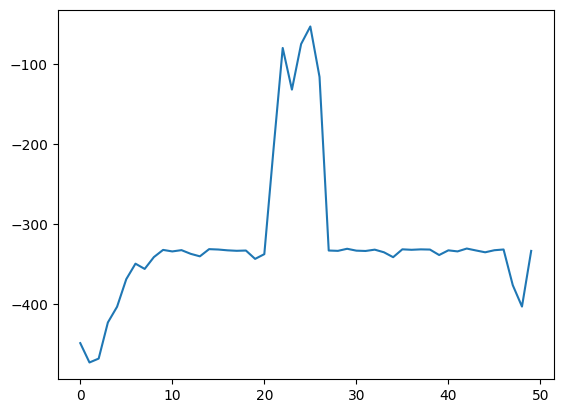

In [15]:
plt.plot(episodes, scores)